# PROBLEM --1 FOR ROSE DATASET

# Importing Necessary Libraries:-

In [1]:
#conda update conda

In [2]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
# Reading data 
rose = pd.read_csv(r'C:\Users\abhay\Downloads\Rose.csv')

In [4]:
# checking head of dataset
rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
#Check data types of the dataset
rose.dtypes

YearMonth     object
Rose         float64
dtype: object

In [6]:
# We are providing inputs to tell pandas that we are trying to work with time series
rose = pd.read_csv(r'C:\Users\abhay\Downloads\Rose.csv', parse_dates = ['YearMonth'])
rose

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0
...,...,...
182,1995-03-01,45.0
183,1995-04-01,52.0
184,1995-05-01,28.0
185,1995-06-01,40.0


In [7]:
rose.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [8]:
# It is recommended that we make our time series reference as the index
rose = pd.read_csv(r'C:\Users\abhay\Downloads\Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [9]:
# checking head of data
rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [10]:
# checking shape of data
rose.shape

(187, 1)

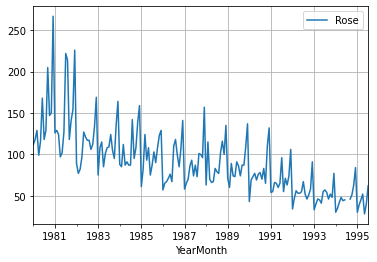

In [11]:
# plotting the time series data
rose.plot();
plt.grid()

In [12]:
# checking info of data
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [13]:
# describing data
print("Describing data before missing value inputaion")
rose.describe()

Describing data before missing value inputaion


,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [14]:
# checking for null values in the dataset
rose.isnull().sum()

Rose    2
dtype: int64

In [15]:
# checking on which year we have null values
rose['1994']

C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0


In [16]:
# imputing missng values using spline method
rose1 = rose.interpolate(method = 'spline', order = 1)

In [17]:
# imputing into original dataset
rose = rose1

In [18]:
# chceking for null values after interpolation
rose.isnull().sum()

Rose    0
dtype: int64

In [19]:
# checking head of data after treating missing values
rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [20]:
# chceking datatypes
rose.dtypes

Rose    float64
dtype: object

In [21]:
# chceking description of data
print("Describing data after missing value imputaion")
rose.describe()

Describing data after missing value imputaion


,Rose
count,187.000000
mean,89.927087
std,39.224153
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


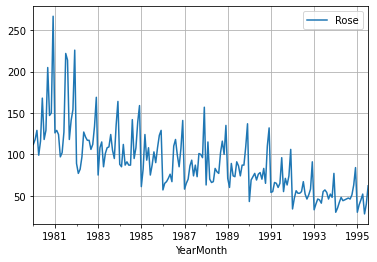

In [22]:
# plotting the time series data
rose.plot();
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

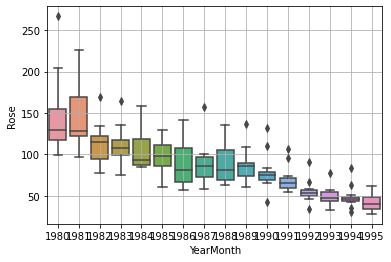

In [23]:
# plotting yearly box plot
import seaborn as sns
sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.grid();

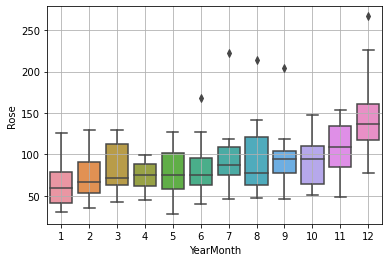

In [24]:
# plotting monthly box plot
sns.boxplot(x = rose.index.month,y = rose['Rose'])
plt.grid();

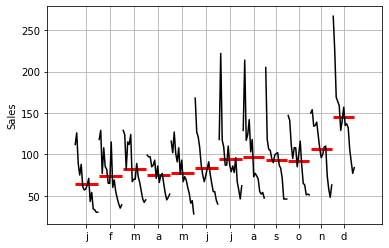

In [25]:
# Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.
from statsmodels.graphics.tsaplots import month_plot

month_plot(rose['Rose'],ylabel='Sales')
plt.grid();

In [26]:
# Plot a graph of monthly Sales across years
monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month, index = rose.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


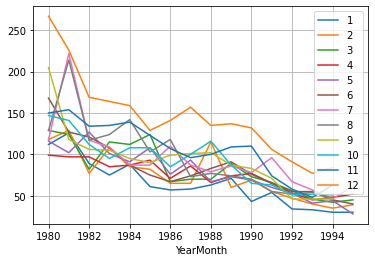

In [27]:
# Plot a graph of monthly Sales across years
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

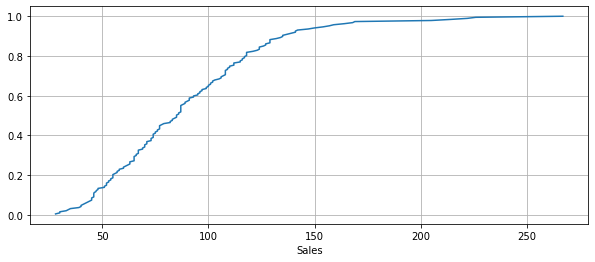

In [28]:
# Plot the Empirical Cumulative Distribution
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 4))
cdf = ECDF(rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

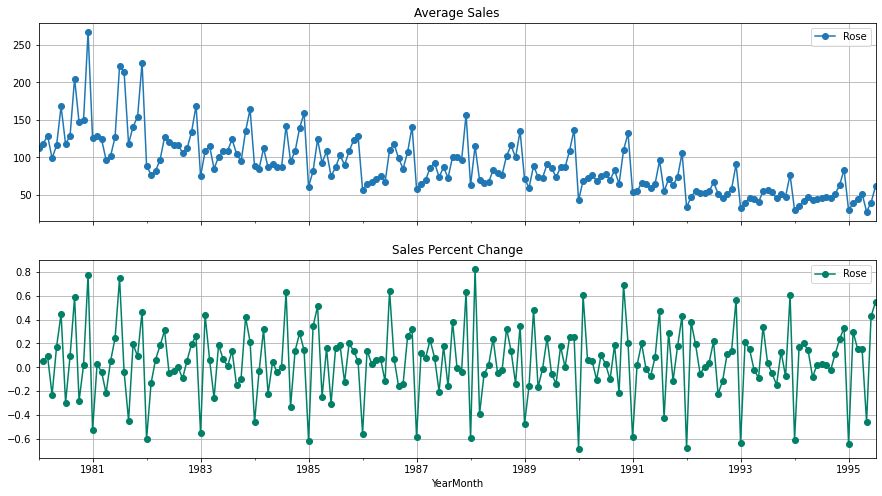

In [29]:
# Plot the average Sales per month and the month on month percentage change of Sales.
# group by date and get average RetailSales, and precent change
average    = rose.groupby(rose.index)["Rose"].mean()
pct_change = rose.groupby(rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

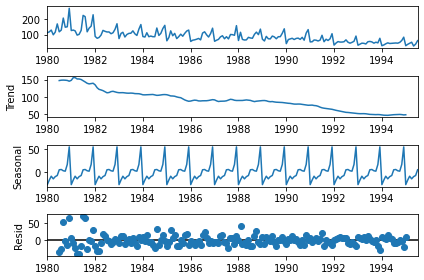

In [30]:
#Decompose the time series additively
rose_add_decompose = seasonal_decompose(rose, model = 'additive', period = 12)
rose_add_decompose.plot()
plt.show()

In [31]:
# getting trend, seasonal and residual component of data
trend = rose_add_decompose.trend
seasonality = rose_add_decompose.seasonal
residual = rose_add_decompose.resid

In [32]:
# getting data for trend, seasonality and residual
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.921780
1980-02-01   -17.445103
1980-03-01    -9.299901
1980-04-01   -15.112401
1980-05-01   -10.210615
1980-06-01    -7.692758
1980-07-01     4.938434
1980-08-01     5.589575
1980-09-01     2.761554
1980-10-01     1.858776
1980-11-01    16.833776
1980-12-01    55.700443
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.021767
1980-08-01   -24.714575
1980-09-01    53.863446
1980-10-01    -2.942109
1980-11-01   -14.250443
1980-12-01    66.17455

In [33]:
# reading only trend and residual of data without seasonality
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    113.061566
1980-08-01    123.410425
1980-09-01    202.238446
1980-10-01    145.141224
1980-11-01    133.166224
1980-12-01    211.299557
dtype: float64

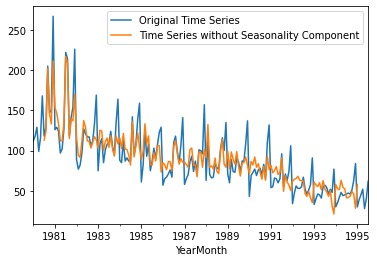

In [34]:
# plotting data with and without seasonality
rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

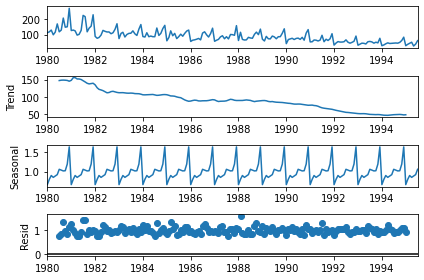

In [35]:
#Decompose the time series multiplicativly
rose_mul_decompose = seasonal_decompose(rose, model = 'multiplicative', period = 12)
rose_mul_decompose.plot()
plt.show()

In [36]:
# getting trend, seasonal and residual component of data
trend = rose_mul_decompose.trend
seasonality = rose_mul_decompose.seasonal
residual = rose_mul_decompose.resid

In [37]:
# getting data for trend, seasonality and residual
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
1980-06-01    0.923718
1980-07-01    1.058920
1980-08-01    1.037754
1980-09-01    1.017402
1980-10-01    1.022303
1980-11-01    1.192007
1980-12-01    1.628173
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.757627
1980-08-01    0.839203
1980-09-01    1.358003
1980-10-01    0.971028
1980-11-01    0.853623
1980-12-01    1.129974
Name: resid, dtype: fl

In [38]:
# reading only trend and residual of data without seasonality
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.840960
1980-08-01    148.964203
1980-09-01    149.733003
1980-10-01    149.054361
1980-11-01    148.270290
1980-12-01    146.254974
dtype: float64

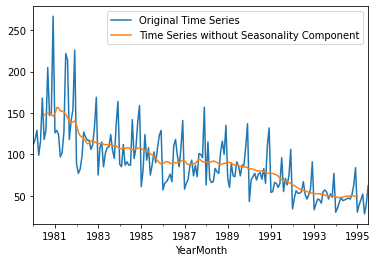

In [39]:
# plotting data without seasonality
rose.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# 3. Split the data into training and test. The test data should start in 1991.

In [40]:
# splitting data into train and test
train = rose[rose.index<'1991'] 
test = rose[rose.index>='1991']

In [41]:
# checking shape of train and test data set
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


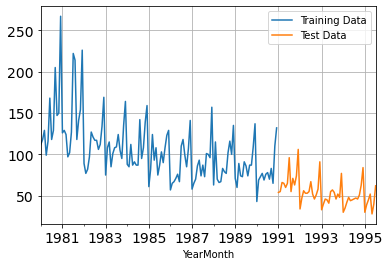

In [42]:
# plotting graph for test and train dataset
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# > Building Various Exponential Smoothing Models

In [43]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

SES - ETS(A, N, N) - Simple Exponential Smoothing

In [44]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [46]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [47]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104984
1991-02-01    87.104984
1991-03-01    87.104984
1991-04-01    87.104984
1991-05-01    87.104984
1991-06-01    87.104984
1991-07-01    87.104984
1991-08-01    87.104984
1991-09-01    87.104984
1991-10-01    87.104984
1991-11-01    87.104984
1991-12-01    87.104984
1992-01-01    87.104984
1992-02-01    87.104984
1992-03-01    87.104984
1992-04-01    87.104984
1992-05-01    87.104984
1992-06-01    87.104984
1992-07-01    87.104984
1992-08-01    87.104984
1992-09-01    87.104984
1992-10-01    87.104984
1992-11-01    87.104984
1992-12-01    87.104984
1993-01-01    87.104984
1993-02-01    87.104984
1993-03-01    87.104984
1993-04-01    87.104984
1993-05-01    87.104984
1993-06-01    87.104984
1993-07-01    87.104984
1993-08-01    87.104984
1993-09-01    87.104984
1993-10-01    87.104984
1993-11-01    87.104984
1993-12-01    87.104984
1994-01-01    87.104984
1994-02-01    87.104984
1994-03-01    87.104984
1994-04-01    87.104984
1994-05-01    87.104984
1994-06-01    87

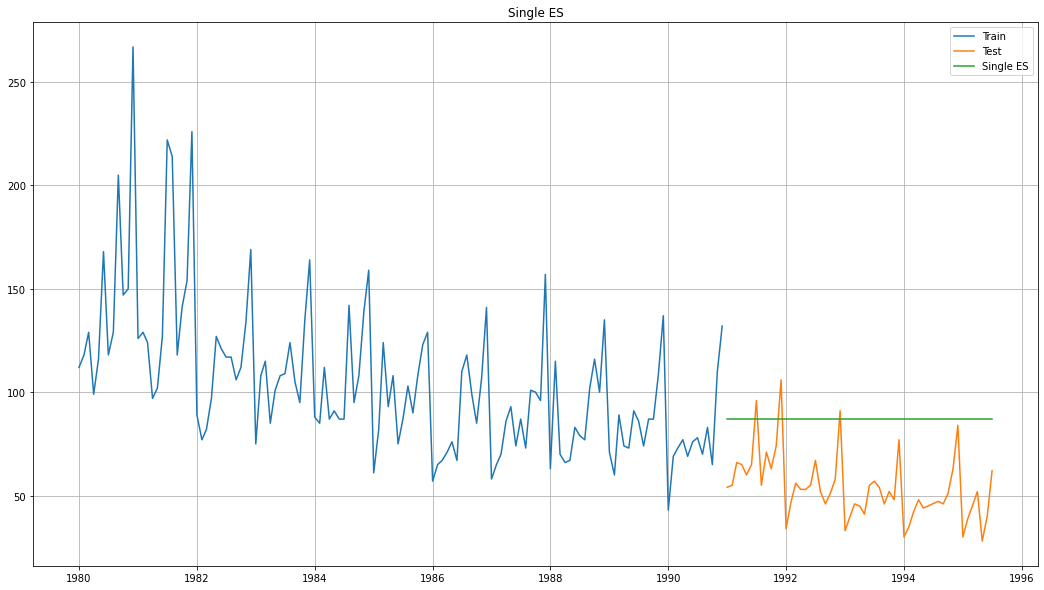

In [48]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')

plt.legend(loc='best')
plt.grid()
plt.title('Single ES');

In [49]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.74838945471327
SES RMSE (calculated using statsmodels): 36.74838945471326


In [50]:
resultsDf1 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Single ES'])
resultsDf1

,Test RMSE
Single ES,36.748389


Holt - ETS(A, A, N) - Holt's linear method

In [51]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.9086427682180844e-08, 'smoothing_trend': 7.302464353829351e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81629861505857, 'initial_trend': -0.4943753249082896, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [52]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.064380
1991-02-01    71.570005
1991-03-01    71.075630
1991-04-01    70.581254
1991-05-01    70.086879
1991-06-01    69.592504
1991-07-01    69.098128
1991-08-01    68.603753
1991-09-01    68.109378
1991-10-01    67.615002
1991-11-01    67.120627
1991-12-01    66.626252
1992-01-01    66.131877
1992-02-01    65.637501
1992-03-01    65.143126
1992-04-01    64.648751
1992-05-01    64.154375
1992-06-01    63.660000
1992-07-01    63.165625
1992-08-01    62.671249
1992-09-01    62.176874
1992-10-01    61.682499
1992-11-01    61.188123
1992-12-01    60.693748
1993-01-01    60.199373
1993-02-01    59.704997
1993-03-01    59.210622
1993-04-01    58.716247
1993-05-01    58.221871
1993-06-01    57.727496
1993-07-01    57.233121
1993-08-01    56.738745
1993-09-01    56.244370
1993-10-01    55.749995
1993-11-01    55.255619
1993-12-01    54.761244
1994-01-01    54.266869
1994-02-01    53.772493
1994-03-01    53.278118
1994-04-01    52.783743
1994-05-01    52.289367
1994-06-01    51

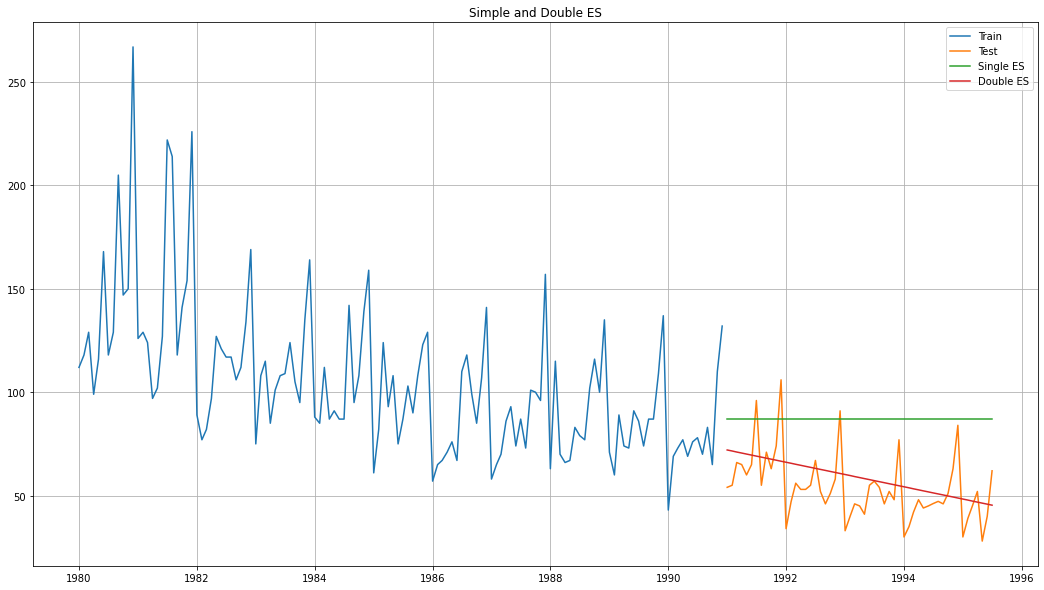

In [53]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')
plt.plot(DES_predict, label='Double ES')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double ES');

In [54]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.255861145392286


In [55]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Double ES'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf1

,Test RMSE
Single ES,36.748389
Double ES,15.255861


Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive

In [56]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08830330642635406, 'smoothing_trend': 6.730635331927582e-05, 'smoothing_seasonal': 0.004455138229351625, 'damping_trend': nan, 'initial_level': 146.88752868155674, 'initial_trend': -0.5492163940406024, 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
       -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
         4.85724354,   2.9520333 ,  21.05004912,  63.29916317]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     42.672382
1991-02-01     54.439917
1991-03-01     61.841877
1991-04-01     50.636896
1991-05-01     58.918913
1991-06-01     63.870294
1991-07-01     73.240626
1991-08-01     78.790723
1991-09-01     74.257853
1991-10-01     71.805821
1991-11-01     89.354796
1991-12-01    131.072194
1992-01-01     36.081787
1992-02-01     47.849323
1992-03-01     55.251283
1992-04-01     44.046301
1992-05-01     52.328318
1992-06-01     57.279699
1992-07-01     66.650031
1992-08-01     72.200129
1992-09-01     67.667259
1992-10-01     65.215226
1992-11-01     82.764201
1992-12-01    124.481599
1993-01-01     29.491193
1993-02-01     41.258728
1993-03-01     48.660688
1993-04-01     37.455706
1993-05-01     45.737724
1993-06-01     50.689105
1993-07-01     60.059436
1993-08-01     65.609534
1993-09-01     61.076664
1993-10-01     58.624632
1993-11-01     76.173607
1993-12-01    117.891005
1994-01-01     22.900598
1994-02-01     34.668134
1994-03-01     42.070093
1994-04-01     30.865112


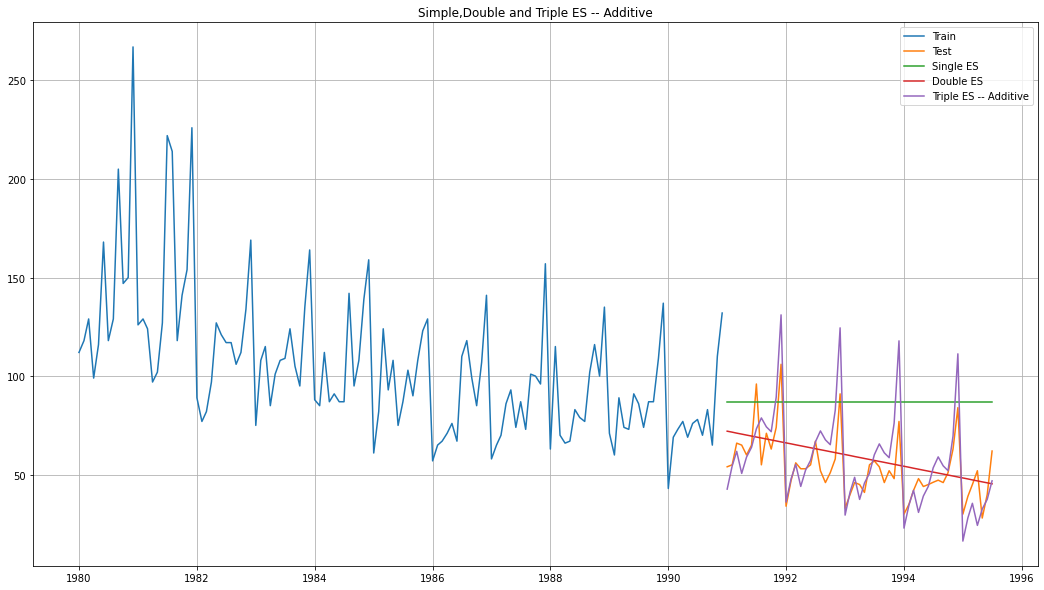

In [58]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')
plt.plot(DES_predict, label='Double ES')
plt.plot(TES_predict, label='Triple ES -- Additive')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple ES -- Additive');

In [59]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.23282652785053


In [60]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Triple ES -- Additive'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf1

,Test RMSE
Single ES,36.748389
Double ES,15.255861
Triple ES -- Additive,14.232827


Holt-Winters - ETS(A, A, M) - Holt Winter's linear method -- Multiplicative

In [61]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07132109562890512, 'smoothing_trend': 0.04553831096563722, 'smoothing_seasonal': 8.356711212063695e-07, 'damping_trend': nan, 'initial_level': 134.25655591779326, 'initial_trend': -0.8038265942903572, 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
       1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
       1.40577823, 1.93832412]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [62]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01     56.334597
1991-02-01     63.692059
1991-03-01     69.388935
1991-04-01     60.452304
1991-05-01     67.770362
1991-06-01     73.568837
1991-07-01     80.653311
1991-08-01     85.572391
1991-09-01     80.724066
1991-10-01     78.812306
1991-11-01     91.559770
1991-12-01    125.830690
1992-01-01     54.186661
1992-02-01     61.255856
1992-03-01     66.726340
1992-04-01     58.125185
1992-05-01     65.153138
1992-06-01     70.718509
1992-07-01     77.518382
1992-08-01     82.235452
1992-09-01     77.565928
1992-10-01     75.718876
1992-11-01     87.954200
1992-12-01    120.859237
1993-01-01     52.038725
1993-02-01     58.819652
1993-03-01     64.063746
1993-04-01     55.798066
1993-05-01     62.535913
1993-06-01     67.868180
1993-07-01     74.383453
1993-08-01     78.898513
1993-09-01     74.407789
1993-10-01     72.625445
1993-11-01     84.348631
1993-12-01    115.887785
1994-01-01     49.890789
1994-02-01     56.383449
1994-03-01     61.401152
1994-04-01     53.470947


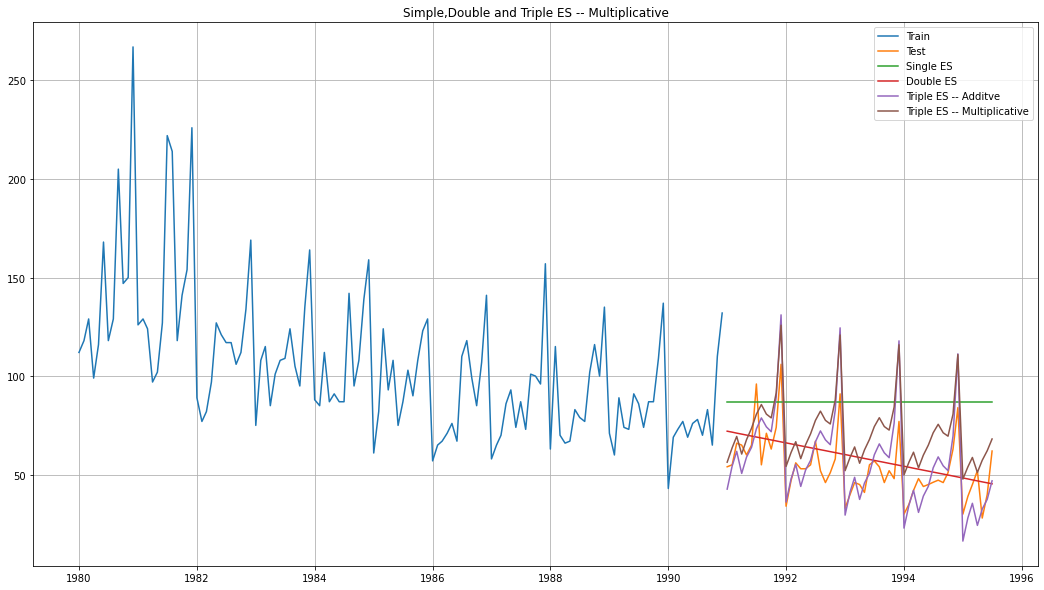

In [63]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize = (18, 10))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Single ES')
plt.plot(DES_predict, label='Double ES')
plt.plot(TES_predict, label='Triple ES -- Additve')
plt.plot(TES_predict_am, label='Triple ES -- Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple ES -- Multiplicative');

In [64]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 20.13155549909118


In [65]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Triple ES -- Multiplicative'])

resultsDf1 = pd.concat([resultsDf1, resultsDf_temp])
resultsDf1

,Test RMSE
Single ES,36.748389
Double ES,15.255861
Triple ES -- Additive,14.232827
Triple ES -- Multiplicative,20.131555


Building Linear Regression

In [66]:
print(rose.shape)
print(train.shape)
print(test.shape)

(187, 1)
(132, 1)
(55, 1)


In [67]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [68]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [69]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

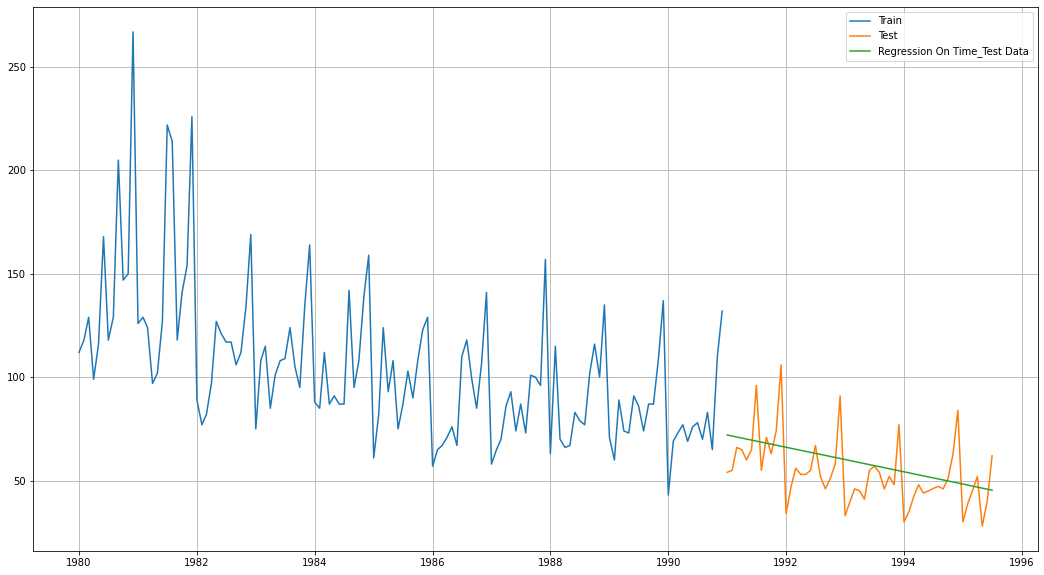

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
plt.figure(figsize = (18, 10))
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [71]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255 


In [72]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf2

,Test RMSE
RegressionOnTime,15.255492


Building Naive Model

In [73]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [74]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

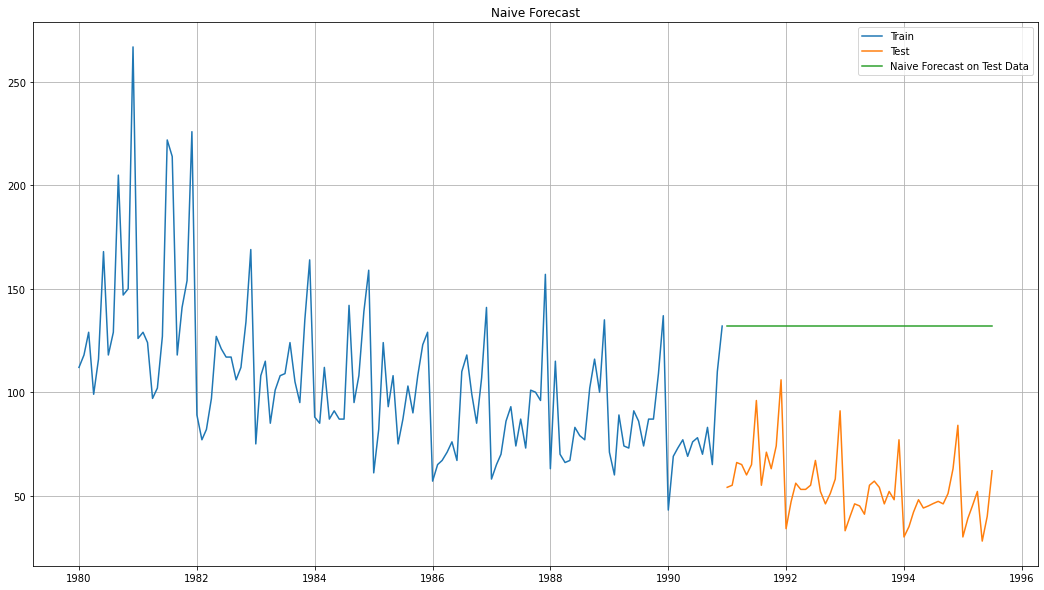

In [75]:
plt.figure(figsize = (18, 10))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [76]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.672


In [77]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_2])
resultsDf2

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475


Building Simple Average Model

In [78]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [79]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


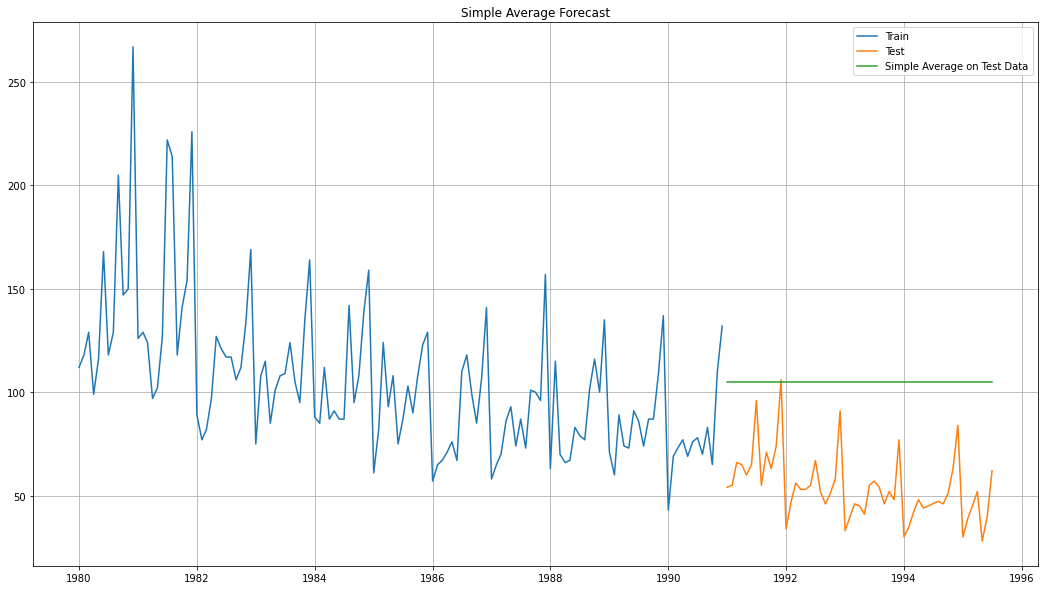

In [80]:
plt.figure(figsize = (18, 10))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [81]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [82]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_3])
resultsDf2

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298


Building Moving Average(MA) Model

In [83]:
MovingAverage = rose.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [84]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


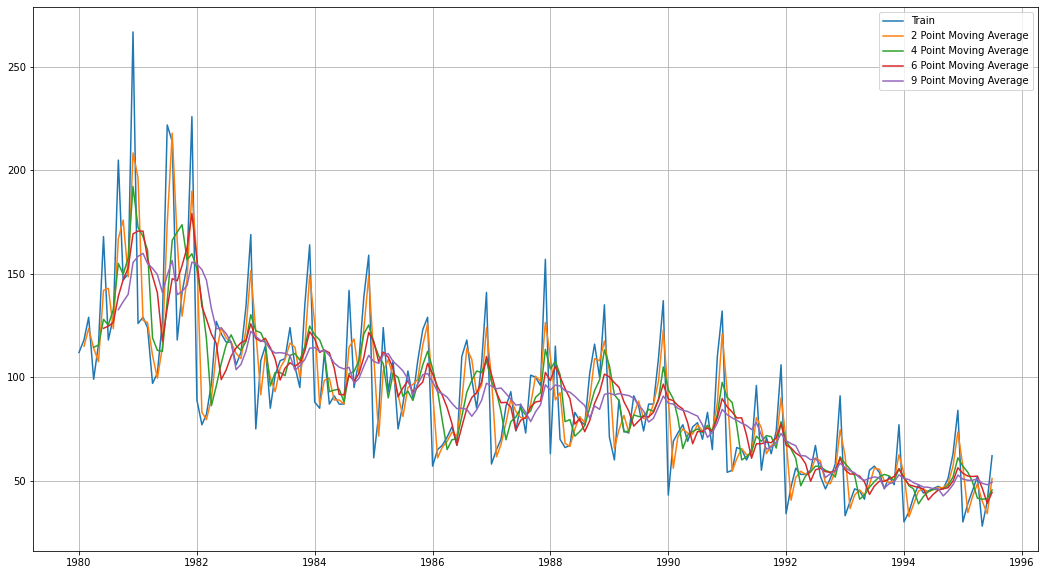

In [85]:
## Plotting on the whole data
plt.figure(figsize = (18, 10))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [86]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

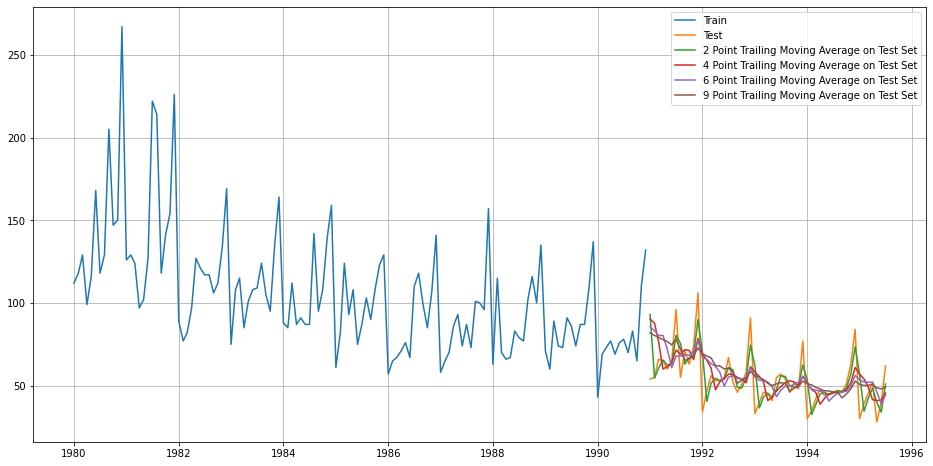

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [88]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.722


In [89]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_4])
resultsDf2

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
9pointTrailingMovingAverage,14.721520


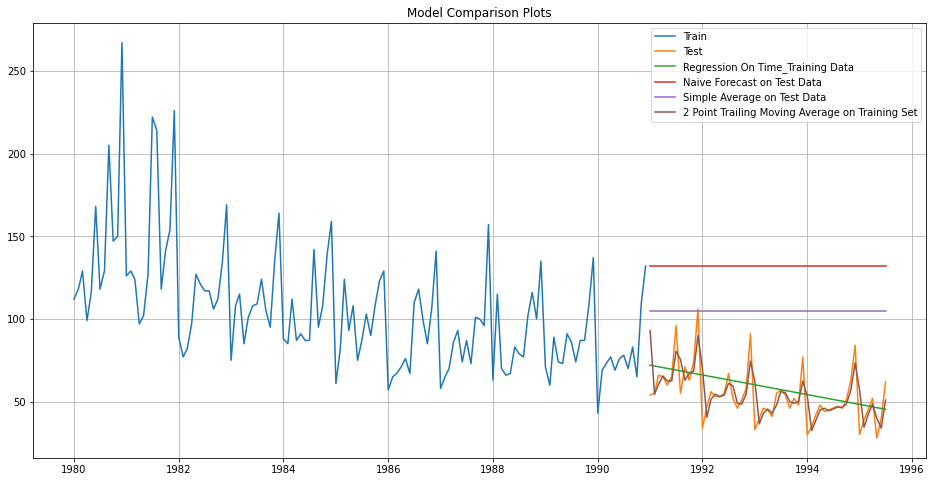

In [90]:
## Plotting on both Training and Test data
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
dftest = adfuller(rose,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.4675494470630276
Number of lags used 13


In [93]:
dftest = adfuller(rose.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.164
DF test p-value is 2.9904329878167767e-11
Number of lags used 12


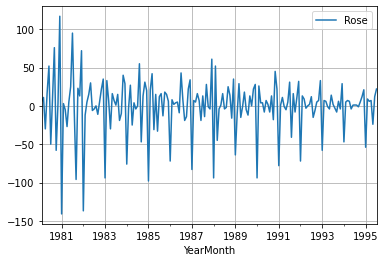

In [94]:
rose.diff().dropna().plot(grid=True);

In [95]:
diff = rose.diff().dropna()
diff

,Rose
YearMonth,
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0
1980-06-01,52.0
...,...
1995-03-01,6.0
1995-04-01,7.0
1995-05-01,-24.0


# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Building Automated ARIMA model

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

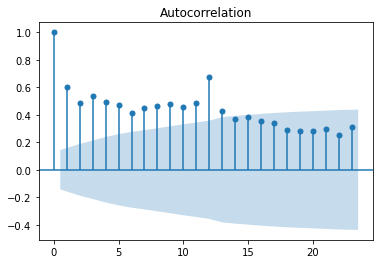

In [97]:
plot_acf(rose,alpha=0.05);

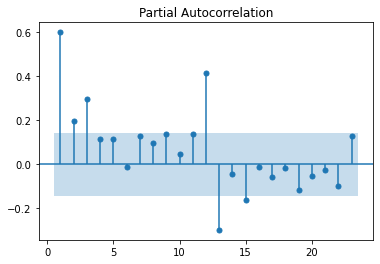

In [98]:
plot_pacf(rose,zero=False,alpha=0.05,method='ywmle');

check for stationarity on training data set

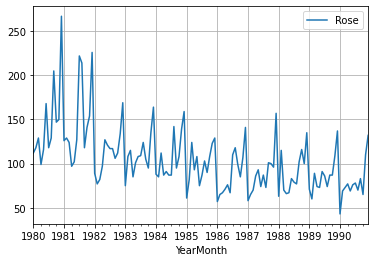

In [99]:
train.plot(grid=True);

In [100]:
dftest = adfuller(train,regression='ct')
print('rose test statistic is %3.3f' %dftest[0])
print('rose test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

rose test statistic is -1.686
rose test p-value is 0.7569093051047057
Number of lags used 13


In [101]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('rose test statistic is %3.3f' %dftest[0])
print('rose test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

rose test statistic is -6.804
rose test p-value is 3.894831356782385e-08
Number of lags used 12


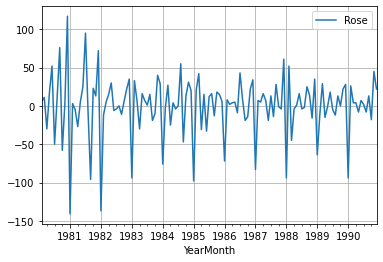

In [102]:
train.diff().dropna().plot(grid=True);

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [104]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [105]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [106]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535752
ARIMA(0, 1, 3) - AIC:1280.5453761734652
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380076
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.870722330997
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264168


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:1274.6953190416875
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627203
ARIMA(3, 1, 2) - AIC:1283.720740597714


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:1278.6543993387522


C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [107]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695319
15,"(3, 1, 3)",1278.654399
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [108]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 25 Jul 2021   AIC                           1274.695
Time:                        22:38:35   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.029      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.697      0.000      -0.893      -0.565
ma.L1          1.0447      0.616      1.695      0.0

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


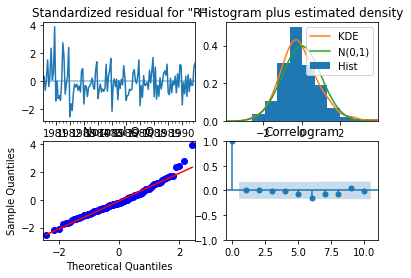

In [109]:
results_auto_ARIMA.plot_diagnostics();

In [110]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [111]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [112]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
# mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse)

RMSE: 36.76869087421142


In [113]:
resultsDf3 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2,1,3) - Auto'])

resultsDf3

,Test RMSE
"ARIMA(2,1,3) - Auto",36.768691


BUILDING AUTOMATED SARIMA MODEL:-

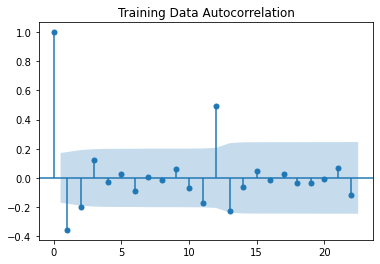

In [114]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [115]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 9) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 9)
Model: (0, 1, 2)(0, 0, 2, 9)
Model: (0, 1, 3)(0, 0, 3, 9)
Model: (1, 1, 0)(1, 0, 0, 9)
Model: (1, 1, 1)(1, 0, 1, 9)
Model: (1, 1, 2)(1, 0, 2, 9)
Model: (1, 1, 3)(1, 0, 3, 9)
Model: (2, 1, 0)(2, 0, 0, 9)
Model: (2, 1, 1)(2, 0, 1, 9)
Model: (2, 1, 2)(2, 0, 2, 9)
Model: (2, 1, 3)(2, 0, 3, 9)
Model: (3, 1, 0)(3, 0, 0, 9)
Model: (3, 1, 1)(3, 0, 1, 9)
Model: (3, 1, 2)(3, 0, 2, 9)
Model: (3, 1, 3)(3, 0, 3, 9)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 9) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 9) - AIC:1232.6727463288382
SARIMA(0, 1, 0)x(0, 0, 2, 9) - AIC:1118.4941650746641
SARIMA(0, 1, 0)x(0, 0, 3, 9) - AIC:1001.1868426230758
SARIMA(0, 1, 0)x(1, 0, 0, 9) - AIC:1241.7924649637062
SARIMA(0, 1, 0)x(1, 0, 1, 9) - AIC:1229.3229605583615
SARIMA(0, 1, 0)x(1, 0, 2, 9) - AIC:1116.0043152950716
SARIMA(0, 1, 0)x(1, 0, 3, 9) - AIC:999.8014971519807
SARIMA(0, 1, 0)x(2, 0, 0, 9) - AIC:1129.820686979858
SARIMA(0, 1, 0)x(2, 0, 1, 9) - AIC:1123.7811640808245
SARIMA(0, 1, 0)x(2, 0, 2, 9) - AIC:1110.2973554215246
SARIMA(0, 1, 0)x(2, 0, 3, 9) - AIC:1000.558807142796
SARIMA(0, 1, 0)x(3, 0, 0, 9) - AIC:1016.4218424512708
SARIMA(0, 1, 0)x(3, 0, 1, 9) - AIC:1017.89978314071
SARIMA(0, 1, 0)x(3, 0, 2, 9) - AIC:1011.6124781548342
SARIMA(0, 1, 0)x(3, 0, 3, 9) - AIC:1001.7901190349487
SARIMA(0, 1, 1)x(0, 0, 0, 9) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 9) - AIC:1169.6287225437986
SARIMA(0, 1, 1)x(0, 0, 2, 9) - AI

SARIMA(2, 1, 1)x(2, 0, 2, 9) - AIC:1056.6393700500257
SARIMA(2, 1, 1)x(2, 0, 3, 9) - AIC:947.5863336193015
SARIMA(2, 1, 1)x(3, 0, 0, 9) - AIC:953.259829723923
SARIMA(2, 1, 1)x(3, 0, 1, 9) - AIC:948.7363001428121
SARIMA(2, 1, 1)x(3, 0, 2, 9) - AIC:946.430872118897
SARIMA(2, 1, 1)x(3, 0, 3, 9) - AIC:940.6468637358765
SARIMA(2, 1, 2)x(0, 0, 0, 9) - AIC:1253.9102116146698
SARIMA(2, 1, 2)x(0, 0, 1, 9) - AIC:1146.3263464344377
SARIMA(2, 1, 2)x(0, 0, 2, 9) - AIC:1047.7803558673472
SARIMA(2, 1, 2)x(0, 0, 3, 9) - AIC:936.9397799042624
SARIMA(2, 1, 2)x(1, 0, 0, 9) - AIC:1164.818012173608
SARIMA(2, 1, 2)x(1, 0, 1, 9) - AIC:1149.7508896536099
SARIMA(2, 1, 2)x(1, 0, 2, 9) - AIC:1049.5699655763153
SARIMA(2, 1, 2)x(1, 0, 3, 9) - AIC:934.4066166149737
SARIMA(2, 1, 2)x(2, 0, 0, 9) - AIC:1059.1517576486058
SARIMA(2, 1, 2)x(2, 0, 1, 9) - AIC:1056.4999541290965
SARIMA(2, 1, 2)x(2, 0, 2, 9) - AIC:1043.4658142154935
SARIMA(2, 1, 2)x(2, 0, 3, 9) - AIC:937.0061226787858
SARIMA(2, 1, 2)x(3, 0, 0, 9) - AIC:952.

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
255,"(3, 1, 3)","(3, 0, 3, 9)",914.734579
127,"(1, 1, 3)","(3, 0, 3, 9)",917.317491
191,"(2, 1, 3)","(3, 0, 3, 9)",919.151413
119,"(1, 1, 3)","(1, 0, 3, 9)",926.359588
63,"(0, 1, 3)","(3, 0, 3, 9)",926.727658


In [119]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 25 Jul 2021   AIC                            951.744
Time:                                   22:41:20   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.082      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.918

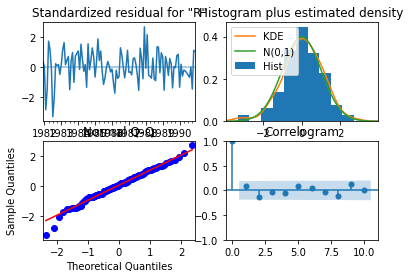

In [120]:
results_auto_SARIMA.plot_diagnostics();

In [121]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,66.900092,16.350226,34.854239,98.945946
1991-02-01,65.988158,16.481446,33.685118,98.291198
1991-03-01,74.438688,16.587371,41.928039,106.949337
1991-04-01,76.040407,16.709956,43.289494,108.791320
1991-05-01,78.415084,16.710569,45.662970,111.167198


In [123]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
# mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse)

RMSE: 27.068898978940556


In [124]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(2,0,3,6) - Auto'])


resultsDf3 = pd.concat([resultsDf3,temp_resultsDf])

resultsDf3

,Test RMSE
"ARIMA(2,1,3) - Auto",36.768691
"SARIMA(2,1,3)(2,0,3,6) - Auto",27.068899


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

BUILDING ARIMA MODEL MANUALLY BASIS CUT OFF FROM ACF AND PACF PLOTS

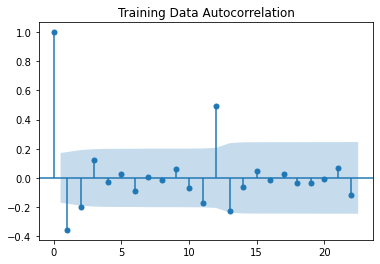

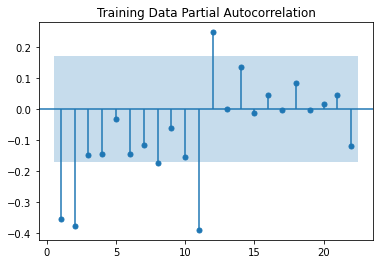

In [125]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [126]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 25 Jul 2021   AIC                           1281.871
Time:                        22:41:21   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


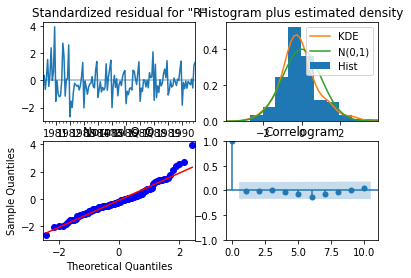

In [127]:
results_manual_ARIMA.plot_diagnostics();

In [128]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [129]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
# mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse)

RMSE: 36.82342004988253


In [130]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2,1,2)- Manual'])


resultsDf3 = pd.concat([resultsDf3,temp_resultsDf])

resultsDf3

,Test RMSE
"ARIMA(2,1,3) - Auto",36.768691
"SARIMA(2,1,3)(2,0,3,6) - Auto",27.068899
"ARIMA(2,1,2)- Manual",36.823420


BUILDING SARIMA MODEL MANUALLY BASIS CUT OFF FROM ACF AND PACF PLOTS

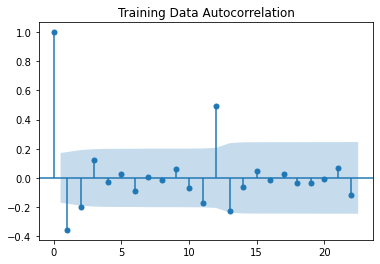

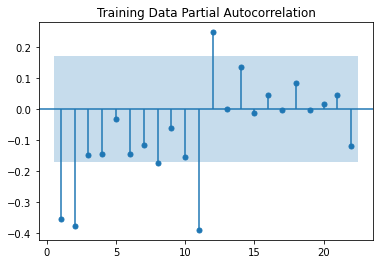

In [131]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [132]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(6, 0, 0, 8),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(6, 0, [], 8)   Log Likelihood                -343.066
Date:                            Sun, 25 Jul 2021   AIC                            708.131
Time:                                    22:41:24   BIC                            734.470
Sample:                                01-01-1980   HQIC                           718.699
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7223      0.516     -1.400      0.162      -1.733       0.289
ar.L2         -0.0067      0.164   

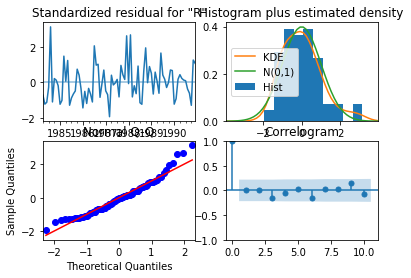

In [133]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [134]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [135]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
# mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse)

RMSE: 25.947909131383774


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [136]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(2,1,2)(6,0,0,8)- Manual'])


resultsDf3 = pd.concat([resultsDf3,temp_resultsDf])

resultsDf3

,Test RMSE
"ARIMA(2,1,3) - Auto",36.768691
"SARIMA(2,1,3)(2,0,3,6) - Auto",27.068899
"ARIMA(2,1,2)- Manual",36.823420
"SARIMA(2,1,2)(6,0,0,8)- Manual",25.947909


In [137]:
pd.concat([resultsDf1,resultsDf2,resultsDf3])

,Test RMSE
Single ES,36.748389
Double ES,15.255861
Triple ES -- Additive,14.232827
Triple ES -- Multiplicative,20.131555
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [138]:
full_data_model = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(6, 0, 0, 8),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(6, 0, [], 8)   Log Likelihood                -556.419
Date:                            Sun, 25 Jul 2021   AIC                           1134.837
Time:                                    22:41:27   BIC                           1166.877
Sample:                                01-01-1980   HQIC                          1147.857
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7499      0.347     -2.160      0.031      -1.430      -0.069
ar.L2         -0.0074      0.112   

In [139]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [140]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head(12)

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,43.290622,14.418919,15.030060,71.551185
1995-09-01,41.956414,14.586460,13.367477,70.545351
1995-10-01,44.305924,14.629753,15.632136,72.979713
1995-11-01,45.599687,14.769179,16.652628,74.546746
1995-12-01,64.416160,14.831457,35.347038,93.485282
1996-01-01,25.504298,14.946533,-3.790368,54.798964
1996-02-01,30.262000,15.020230,0.822890,59.701109
1996-03-01,37.197958,15.122548,7.558308,66.837607
1996-04-01,40.295210,15.452243,10.009370,70.581051
1996-05-01,36.876788,15.575006,6.350337,67.403238


In [141]:
rmse = mean_squared_error(rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 30.69046635681222


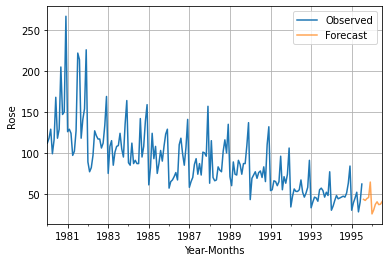

In [142]:
axis = rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

#            END